# Boosting

### Problem Statement -

        - Divide the data (Diabetes) into training and test datasets and create a Boosting Model to 
          classify 'Class Variable'.

### Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
db = pd.read_csv ("~/desktop/Digi 360/Module 20/Datasets-9/Diabetes_RF.csv",encoding='mac_roman')
db.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [3]:
# Renaming columns

db = db.rename(columns={' Number of times pregnant':'np', ' Plasma glucose concentration':'plasma',
                       ' Diastolic blood pressure':'bp',' Triceps skin fold thickness':'tsf',
                       ' 2-Hour serum insulin':'serum',' Body mass index':'bmi',
                       ' Diabetes pedigree function':'dpf',' Age (years)':'age',' Class variable':'class'})
db.columns

Index(['np', 'plasma', 'bp', 'tsf', 'serum', 'bmi', 'dpf', 'age', 'class'], dtype='object')

In [4]:
db.shape

(768, 9)

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
np        768 non-null int64
plasma    768 non-null int64
bp        768 non-null int64
tsf       768 non-null int64
serum     768 non-null int64
bmi       768 non-null float64
dpf       768 non-null float64
age       768 non-null int64
class     768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [6]:
db.isnull().sum()

np        0
plasma    0
bp        0
tsf       0
serum     0
bmi       0
dpf       0
age       0
class     0
dtype: int64

### Basic EDA

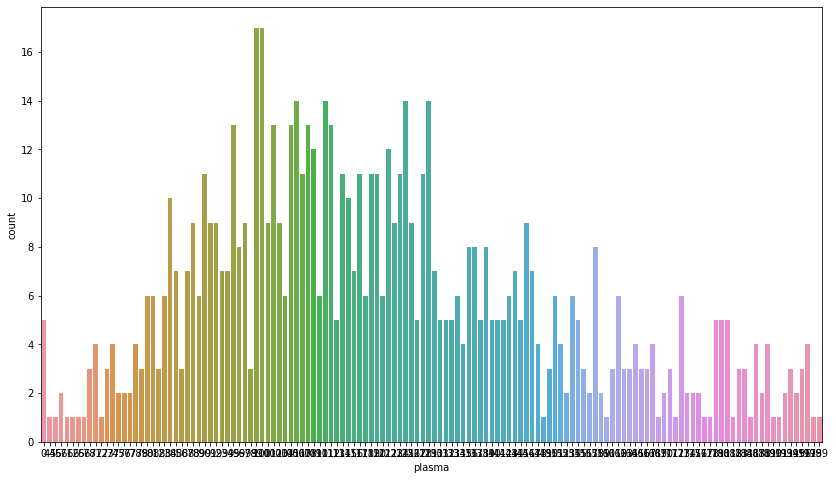

In [7]:
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.countplot(x="plasma", data=db)

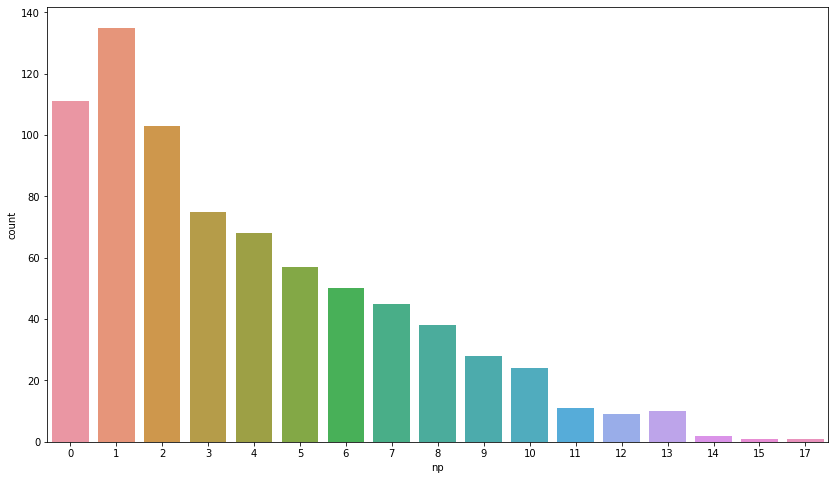

In [8]:
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.countplot(x="np", data=db)

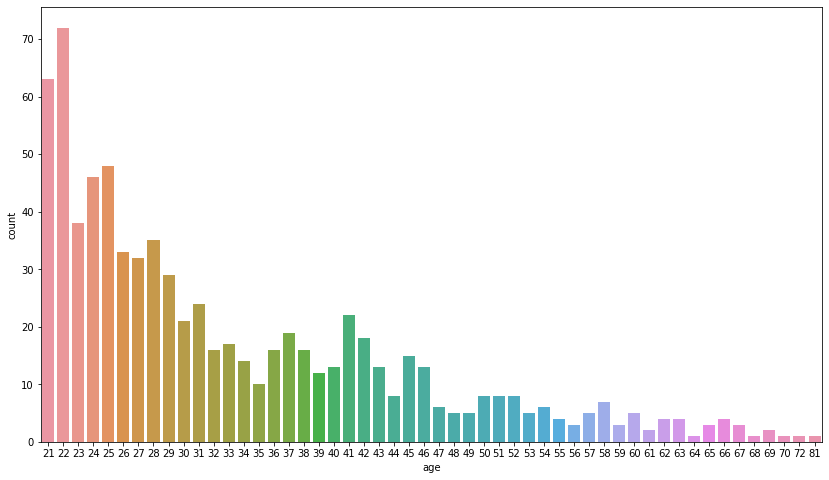

In [9]:
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.countplot(x="age", data=db)

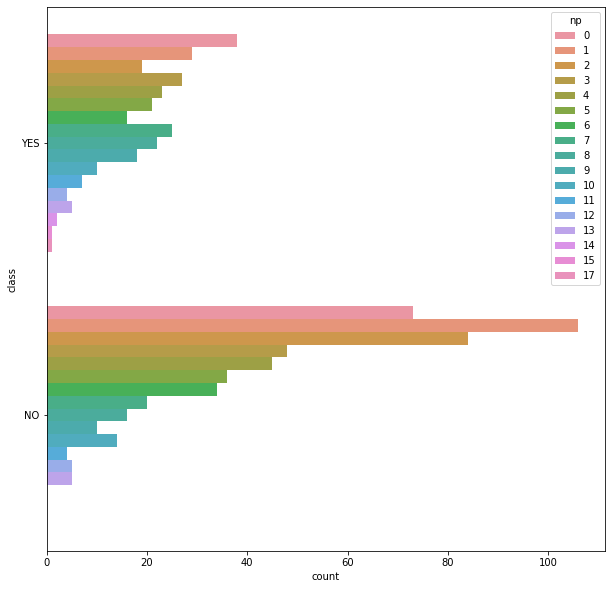

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(y="class", hue="np", data=db);

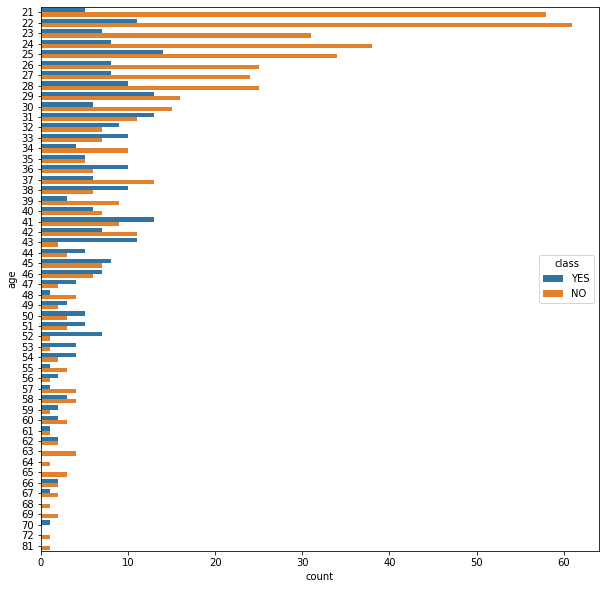

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(y="age", hue="class", data=db);

### Splitting the dataset 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
db_X = db.iloc[:,:8]
db_X.head()

,np,plasma,bp,tsf,serum,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
db_y = db.iloc[:,8]
db_y.head()

0    YES
1     NO
2    YES
3     NO
4    YES
Name: class, dtype: object

In [15]:
X_train, X_test, y_train, y_test = train_test_split(db_X, db_y, test_size=0.2,random_state=4)

In [16]:
X_train.head()

,np,plasma,bp,tsf,serum,bmi,dpf,age
596,0,67,76,0,0,45.3,0.194,46
90,1,80,55,0,0,19.1,0.258,21
734,2,105,75,0,0,23.3,0.560,53
694,2,90,60,0,0,23.5,0.191,25
517,7,125,86,0,0,37.6,0.304,51


In [17]:
y_train.head()

596    NO
90     NO
734    NO
694    NO
517    NO
Name: class, dtype: object

### Building the model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
# Checking the score on train data
dt.score(X_train,y_train)

1.0

In [21]:
# Checking the score on test data
dt.score(X_test,y_test)

0.6883116883116883

So our model is overfitting here because train score is 100% and test score is 70%. Let's go for ensemble methods.

### RandomForest Classifier

In [22]:
rf = RandomForestClassifier(n_estimators=10)

In [23]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
#Finding score for test Data
rf.score(X_test, y_test)

0.7337662337662337

In [25]:
#Finding score for train Data
rf.score(X_train, y_train)

0.9853420195439739

Still we can see overfitting so let's go for Adaboosting

### AdaBoosting

In [26]:
#Ada boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=dt,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [27]:
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

In [28]:
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict_proba(X_test)
predictions[:10]

array([[0.26894142, 0.73105858],
       [0.26894142, 0.73105858],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.26894142, 0.73105858],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142]])

In [29]:
# metrics: AUC
metrics.roc_auc_score(y_test, predictions[:,1])

0.67552790346908

### Hyper Parameter Tuning

In [30]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [31]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=dt,
    learning_rate=0.6,
    algorithm="SAMME")

In [32]:
# run grid search
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

In [33]:
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                mi

In [34]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.351657,0.007054,0.025209,0.000149,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.838659,0.809942,0.795034,0.814577,0.018103,2,0.961137,0.955123,0.953464,0.956575,0.003296
1,0.691005,0.008139,0.047677,0.000578,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.831767,0.815372,0.800926,0.816046,0.012595,1,0.979062,0.973270,0.982561,0.978298,0.003831
2,1.025492,0.000922,0.071539,0.000891,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.822368,0.816520,0.799874,0.812942,0.009523,3,0.997773,0.987657,0.992533,0.992654,0.004130
3,0.435234,0.000396,0.027095,0.000524,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.800125,0.810359,0.791141,0.800557,0.007849,6,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.874679,0.005909,0.052019,0.001224,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.793755,0.818609,0.810080,0.807477,0.010319,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,1.327627,0.022181,0.080475,0.007798,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.795635,0.814119,0.804714,0.804823,0.007552,5,1.000000,1.000000,1.000000,1.000000,0.000000


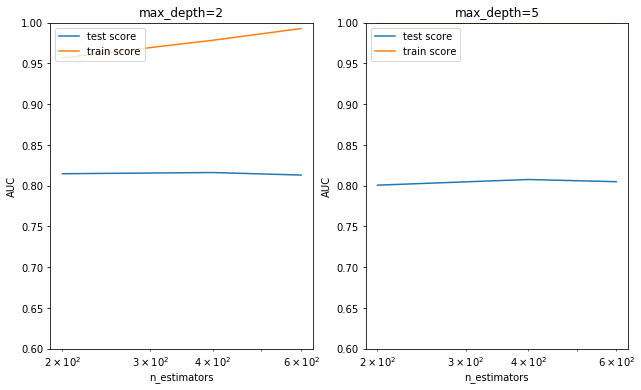

In [35]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

    



The results above show that:

The ensemble with max_depth=5 is clearly overfitting (training auc is almost 1, while the test score is much lower)
At max_depth=2, the model performs slightly better (approx 82% AUC) with a higher test score

Thus, we should go ahead with max_depth=2 and n_estimators=200.

In [36]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [37]:
# predict on test data
predictions = ABC.predict_proba(X_test)
predictions[:10]

array([[0.50324804, 0.49675196],
       [0.52417681, 0.47582319],
       [0.53190657, 0.46809343],
       [0.51324892, 0.48675108],
       [0.52758513, 0.47241487],
       [0.49868989, 0.50131011],
       [0.49299175, 0.50700825],
       [0.51575668, 0.48424332],
       [0.48416925, 0.51583075],
       [0.51635042, 0.48364958]])

In [38]:
# roc auc
metrics.roc_auc_score(y_test, predictions[:, 1])

0.8376696832579186

### XG Boosting

In [39]:
# fit model on training data with default hyperparameters
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[0.79540884, 0.20459114],
       [0.94629514, 0.05370484],
       [0.9989077 , 0.00109229],
       [0.7570283 , 0.2429717 ],
       [0.9969808 , 0.00301919],
       [0.24782324, 0.75217676],
       [0.667894  , 0.33210602],
       [0.7321442 , 0.26785582],
       [0.03615743, 0.9638426 ],
       [0.66398036, 0.33601964]], dtype=float32)

In [41]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 81.62%


In [42]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      




In [43]:
# fit the model
model_cv.fit(X_train, y_train)     

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsampl

In [44]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.039693,0.008679,0.004367,0.000129,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.787698,0.768275,0.785459,0.780469,0.008682,3,0.979979,0.979665,0.979715,0.979786,0.000138
1,0.040108,0.003470,0.004784,0.000710,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.805033,0.784983,0.771570,0.787221,0.013747,2,0.993475,0.996646,0.993447,0.994523,0.001501
2,0.035606,0.000389,0.004355,0.000108,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.807957,0.810359,0.790509,0.802962,0.008839,1,0.994051,0.997170,0.996188,0.995803,0.001302
3,0.031847,0.000079,0.004205,0.000024,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.747180,0.756683,0.753577,0.752479,0.003959,6,0.992505,0.997353,0.996502,0.995453,0.002113
4,0.034963,0.000365,0.004219,0.000031,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.759607,0.756161,0.755997,0.757257,0.001665,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.035135,0.000121,0.004210,0.000018,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.771303,0.775376,0.758523,0.768417,0.007175,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [45]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_subsample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [46]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.039693,0.008679,0.004367,0.000129,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.787698,0.768275,0.785459,0.780469,0.008682,3,0.979979,0.979665,0.979715,0.979786,0.000138
1,0.040108,0.003470,0.004784,0.000710,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.805033,0.784983,0.771570,0.787221,0.013747,2,0.993475,0.996646,0.993447,0.994523,0.001501
2,0.035606,0.000389,0.004355,0.000108,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.807957,0.810359,0.790509,0.802962,0.008839,1,0.994051,0.997170,0.996188,0.995803,0.001302
3,0.031847,0.000079,0.004205,0.000024,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.747180,0.756683,0.753577,0.752479,0.003959,6,0.992505,0.997353,0.996502,0.995453,0.002113
4,0.034963,0.000365,0.004219,0.000031,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.759607,0.756161,0.755997,0.757257,0.001665,5,1.000000,1.000000,1.000000,1.000000,0.000000


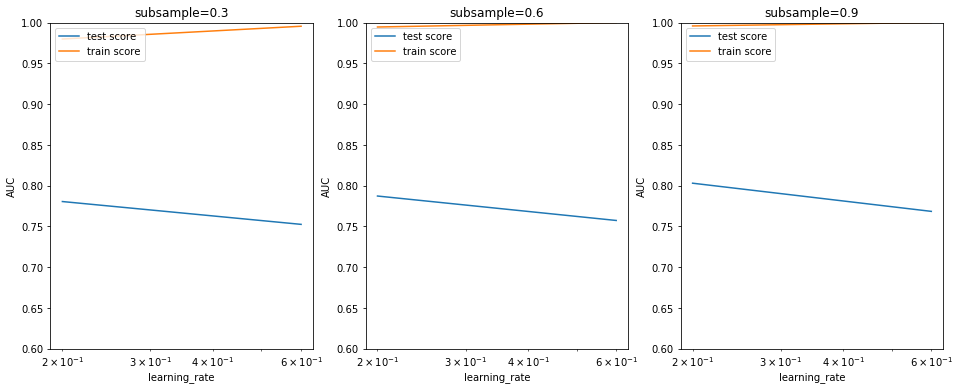

In [47]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [48]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

[18:45:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [49]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[0.79540884, 0.20459114],
       [0.94629514, 0.05370484],
       [0.9989077 , 0.00109229],
       [0.7570283 , 0.2429717 ],
       [0.9969808 , 0.00301919],
       [0.24782324, 0.75217676],
       [0.667894  , 0.33210602],
       [0.7321442 , 0.26785582],
       [0.03615743, 0.9638426 ],
       [0.66398036, 0.33601964]], dtype=float32)

In [50]:
# roc_auc
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.8161764705882353

In [51]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'np': 0.099253945,
 'plasma': 0.21661164,
 'bp': 0.08393331,
 'tsf': 0.09419311,
 'serum': 0.09226099,
 'bmi': 0.1713179,
 'dpf': 0.09046396,
 'age': 0.15196511}

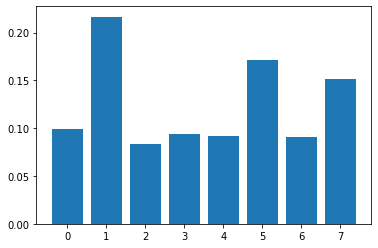

In [52]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

### Conclusion

    - With Random Forest classifier Accuracy of our model is 78% 
    - With Adaboosting the accuracy of the model is 84%
    - With XGBoosting the accuracy of the model is 82%
    - Most important features are `plasma`, `BMI` and `age`